In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Reproducibility
np.random.seed(42)

# Simulated learner interaction dataset
data = {
    "quiz_score": np.random.randint(30, 100, 400),
    "time_spent": np.random.randint(5, 90, 400),
    "attempts": np.random.randint(1, 5, 400),
}

df = pd.DataFrame(data)

# Difficulty label engineering (VERY IMPORTANT)
def assign_difficulty(row):
    if row["quiz_score"] >= 80 and row["attempts"] <= 2:
        return "Easy"
    elif row["quiz_score"] >= 50:
        return "Medium"
    else:
        return "Hard"

df["difficulty"] = df.apply(assign_difficulty, axis=1)

df.head()


,quiz_score,time_spent,attempts,difficulty
0,81,16,3,Medium
1,44,71,3,Hard
2,90,69,4,Medium
3,50,37,1,Medium
4,53,44,4,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   quiz_score  400 non-null    int64 
 1   time_spent  400 non-null    int64 
 2   attempts    400 non-null    int64 
 3   difficulty  400 non-null    object
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


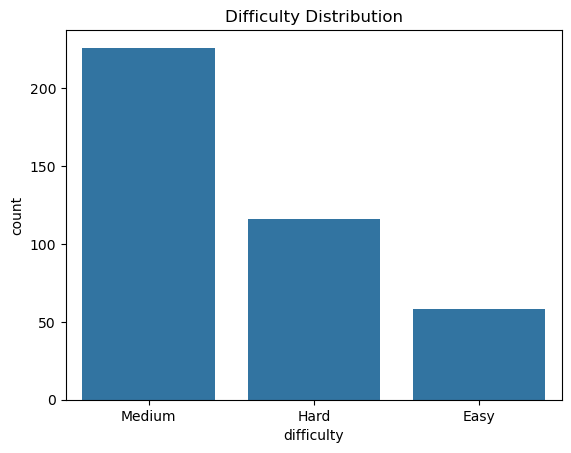

In [3]:
# EDA

df.info()
df.describe()

sns.countplot(x="difficulty", data=df)
plt.title("Difficulty Distribution")
plt.show()


In [4]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)


quiz_score    0
time_spent    0
attempts      0
difficulty    0
dtype: int64


In [5]:
X = df[["quiz_score", "time_spent", "attempts"]]
y = df["difficulty"]

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (279, 3)
Validation: (60, 3)
Test: (60, 3)


In [7]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

        Easy       0.83      0.56      0.67         9
        Hard       1.00      1.00      1.00        17
      Medium       0.89      0.97      0.93        34

    accuracy                           0.92        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.91      0.92      0.91        60



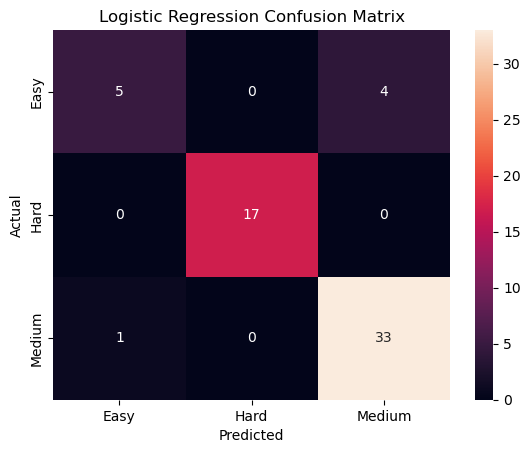

In [8]:
cm = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

        Easy       1.00      1.00      1.00         9
        Hard       1.00      1.00      1.00        17
      Medium       1.00      1.00      1.00        34

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



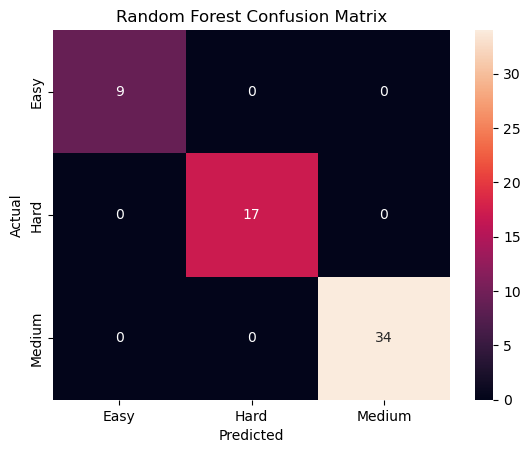

In [10]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.9166666666666666
Random Forest Accuracy: 1.0


In [12]:
import joblib
import os

# Create directory
os.makedirs("saved_models", exist_ok=True)

# Save models
joblib.dump(log_model, "saved_models/logistic_model.pkl")
joblib.dump(rf_model, "saved_models/random_forest_model.pkl")

# Save preprocessing objects
joblib.dump(scaler, "saved_models/scaler.pkl")
joblib.dump(label_encoder, "saved_models/label_encoder.pkl")

print("✅ Models and preprocessors saved successfully!")


✅ Models and preprocessors saved successfully!


In [13]:
# Load again to verify
rf_loaded = joblib.load("saved_models/random_forest_model.pkl")
scaler_loaded = joblib.load("saved_models/scaler.pkl")
le_loaded = joblib.load("saved_models/label_encoder.pkl")

# Test prediction
sample = np.array([[75, 30, 2]])  # quiz_score, time_spent, attempts
sample_scaled = scaler_loaded.transform(sample)

pred = rf_loaded.predict(sample_scaled)
print("Predicted Difficulty:", le_loaded.inverse_transform(pred))


Predicted Difficulty: ['Medium']


/home/vignesh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
